In [84]:
import os
data_dir='C:\\Users\\arind\\Desktop\\ML Models\\19. Convolutional Neural Network\\Project 3\\cell_images'

In [85]:
os.listdir(data_dir)

['test', 'train']

In [86]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [87]:
test_path=data_dir+'\\test\\'
train_path=data_dir+'\\train\\'

In [88]:
os.listdir(train_path), os.listdir(test_path)

(['parasitized', 'uninfected'], ['parasitized', 'uninfected'])

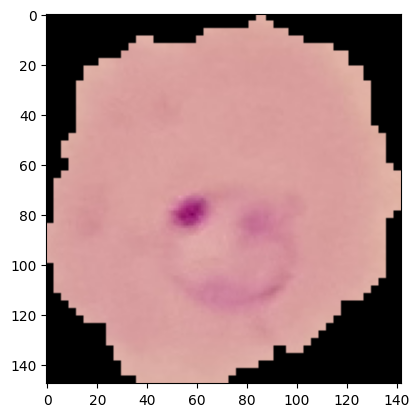

In [89]:
img_p=os.listdir(train_path+'parasitized')[0]
para_cell=train_path+'parasitized\\'+img_p
plt.imshow(imread(para_cell))

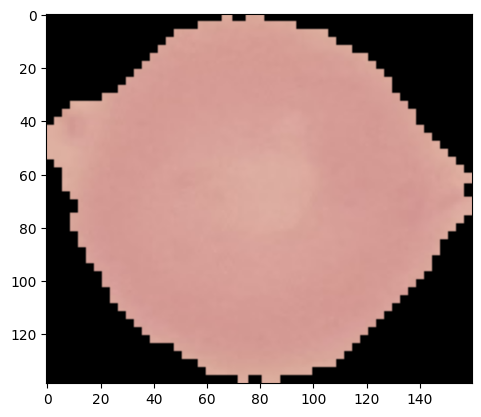

In [90]:
img_i=os.listdir(train_path+'uninfected')[0]
uninf_cell=train_path+'uninfected\\'+img_i
plt.imshow(imread(uninf_cell))

In [91]:
len(os.listdir(train_path+'parasitized')),len(os.listdir(test_path+'parasitized'))

(12480, 1300)

In [92]:
len(os.listdir(train_path+'uninfected')),len(os.listdir(test_path+'uninfected'))

(12480, 1300)

In [93]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    img=imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

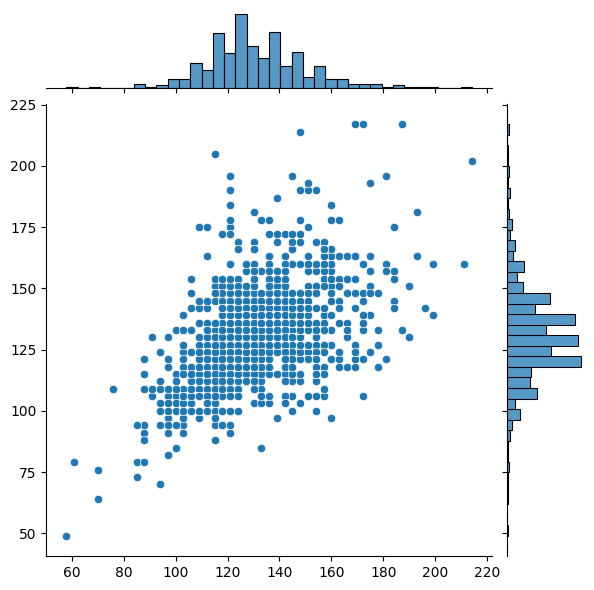

In [94]:
sns.jointplot(x=dim1,y=dim2)

In [95]:
np.mean(dim1),np.mean(dim2)

(130.92538461538462, 130.75)

In [96]:
image_shape=(130,130,3)

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [98]:
image_gen=ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [99]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [100]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D  

In [102]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer,its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [105]:
batch_size = 16 #How many images fit at a time

In [106]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [107]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 593s 378ms/step - loss: 0.9195 - accuracy: 0.5385 - val_loss: 0.6895 - val_accuracy: 0.5485
Epoch 2/20
1560/1560 [==============================] - 625s 400ms/step - loss: 0.6847 - accuracy: 0.5685 - val_loss: 0.6842 - val_accuracy: 0.5585
Epoch 3/20
1560/1560 [==============================] - 659s 422ms/step - loss: 0.6779 - accuracy: 0.5786 - val_loss: 0.6797 - val_accuracy: 0.5785
Epoch 4/20
1560/1560 [==============================] - 640s 410ms/step - loss: 0.6940 - accuracy: 0.5545 - val_loss: 0.6830 - val_accuracy: 0.5515
Epoch 5/20
1560/1560 [==============================] - 594s 381ms/step - loss: 0.6776 - accuracy: 0.5752 - val_loss: 0.6846 - val_accuracy: 0.5596


In [110]:
losses = pd.DataFrame(model.history.history)

<Axes: >

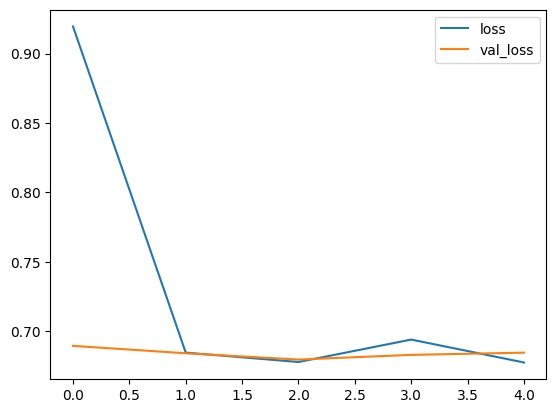

In [111]:
losses[['loss','val_loss']].plot()

In [112]:
model.evaluate_generator(test_image_gen)

[0.6796305775642395, 0.5657692551612854]

In [113]:
pred_probabilities = model.predict_generator(test_image_gen)

In [114]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [115]:
predictions = pred_probabilities > 0.5

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1300
           1       0.56      0.71      0.62      1300

    accuracy                           0.57      2600
   macro avg       0.58      0.57      0.56      2600
weighted avg       0.58      0.57      0.56      2600



In [118]:
confusion_matrix(test_image_gen.classes,predictions)

array([[562, 738],
       [379, 921]], dtype=int64)

In [119]:
#Prediction on single image
para_cell

'C:\\Users\\arind\\Desktop\\ML Models\\19. Convolutional Neural Network\\Project 3\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

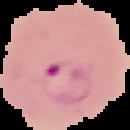

In [120]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(para_cell,target_size=image_shape)
my_image

In [121]:
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)

In [122]:
model.predict(my_image)

1/1 [==============================] - 0s 189ms/step


array([[0.53390664]], dtype=float32)

In [123]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [124]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}